# Aplicando Enginner Features para Machine Learning

Neste notebook estou aplicando meu conhecimento que adquirir no Bootcamp da codenation sobre engenharia de features PCA com Regressão Linear Univariada para machine learning 

Para o projeto utilizei o dataset Adult que esta localizado no Kaggle https://www.kaggle.com/uciml/adult-census-income

In [1]:
#Importando bibliotecas 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv', encoding='latin-1')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Analisando o dataset encontramos valores faltantes com caracteres de "?" nas colunas workclass,occupation,native.country
   * Solução para problema, primeiro trocar valor do caracter para NAN.
   * Substituir os valores faltantes utilizando a moda nas colunas

In [6]:
df[df == '?'] = np.nan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
# Verificando os valores nulos
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Aplicando Machine Learning

### Separando o Target do dataset

In [10]:
X = df.drop(['income'], axis=1)

y = df['income']

In [11]:
X.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


### Dividindo os dados de treinamento e um conjunto de testes separados

In [12]:
# remover o Target do Dataset 
X = df.drop(['income'], axis=1) 
y = df['income']

from sklearn.model_selection import train_test_split

# aplicando metodo teste split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# aplicando LabelEncode nas features 
categorico = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorico:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

# transformando feature x_traino em DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

### Implementando Regressão Linear com PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90)+1

print('número de dimensões necessárias para preservar 90% da variação é',dim)

número de dimensões necessárias para preservar 90% da variação é 12


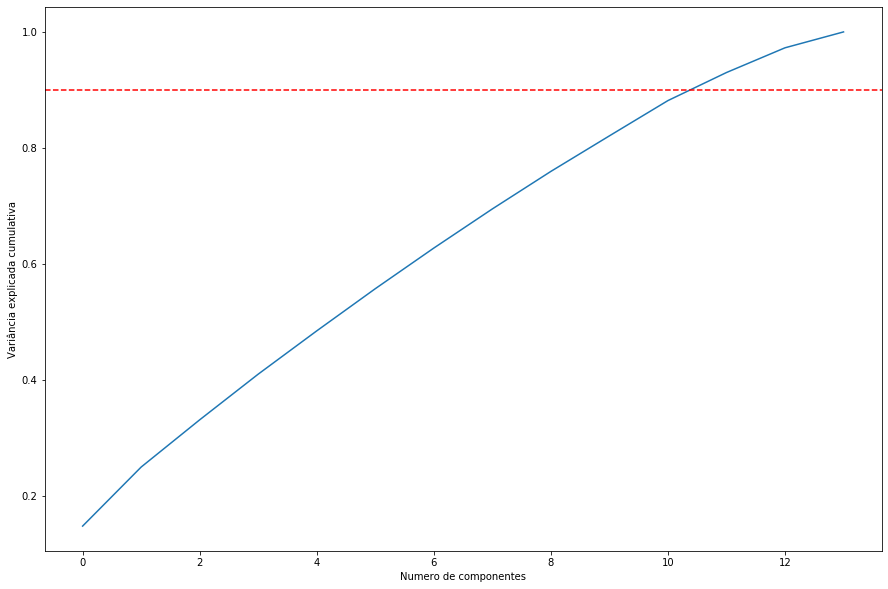

In [14]:
#Plotando em grafico numero de componentes e variância 
pca = pca.fit(X_train)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(15,10))
g = sns.lineplot(np.arange(len(evr)), np.cumsum(evr))
g.axes.axhline(0.90, ls="--", color="red")
plt.xlabel('Numero de componentes')
plt.ylabel('Variância explicada cumulativa');